<a href="https://colab.research.google.com/github/2303A51337Srivarsha/ADM-2025/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression _diabetes

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
diabetes_df = pd.read_csv('/content/Logistic Regression _diabetes-dataset.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes_df = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',   'Age', 'Outcome']]
diabetes_df['diabetes'] = diabetes_df['Outcome'].astype('int')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [12]:
diabetes_df.shape

(768, 10)

In [14]:
X = np.asarray(diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]) # Changed churn_df to diabetes_df and selected the appropriate columns
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [17]:
y = np.asarray(diabetes_df['diabetes'])
y [0:5]

array([1, 0, 1, 0, 1])

In [18]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [23]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [24]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.65961041, 0.34038959],
       [0.73966496, 0.26033504],
       [0.74766502, 0.25233498],
       [0.53606489, 0.46393511],
       [0.6444513 , 0.3555487 ],
       [0.31463595, 0.68536405],
       [0.48475665, 0.51524335],
       [0.47879495, 0.52120505],
       [0.21424296, 0.78575704],
       [0.65651099, 0.34348901],
       [0.47163455, 0.52836545],
       [0.79722399, 0.20277601],
       [0.63960229, 0.36039771],
       [0.80203658, 0.19796342],
       [0.71898137, 0.28101863],
       [0.42375828, 0.57624172],
       [0.2408732 , 0.7591268 ],
       [0.21869962, 0.78130038],
       [0.81639327, 0.18360673],
       [0.80457111, 0.19542889],
       [0.7258526 , 0.2741474 ],
       [0.3961124 , 0.6038876 ],
       [0.59889891, 0.40110109],
       [0.29776746, 0.70223254],
       [0.68156229, 0.31843771],
       [0.57859534, 0.42140466],
       [0.75755135, 0.24244865],
       [0.50632493, 0.49367507],
       [0.62415877, 0.37584123],
       [0.66993753, 0.33006247],
       [0.

In [27]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat)

0.4927536231884058

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34 18]
 [17 85]]


Confusion matrix, without normalization
[[34 18]
 [17 85]]


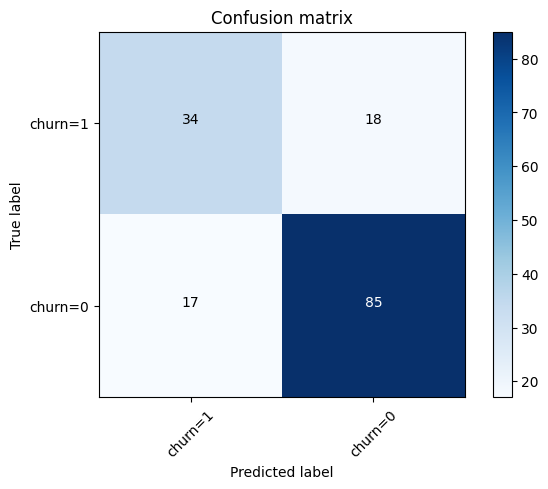

In [33]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [34]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.67      0.65      0.66        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [35]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)


0.5177367118020171

In [37]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.50


multiple_linear_regression


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [50]:
df = pd.read_csv("/content/multiple_linear_regression_dataset.csv")
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [43]:
df.shape

(20, 3)

In [44]:
print(df.corr())

                 age  experience    income
age         1.000000    0.615165  0.532204
experience  0.615165    1.000000  0.984227
income      0.532204    0.984227  1.000000


In [45]:
print(df.describe())


             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


In [54]:
X = df[['age', 'experience']]
y = df['income']

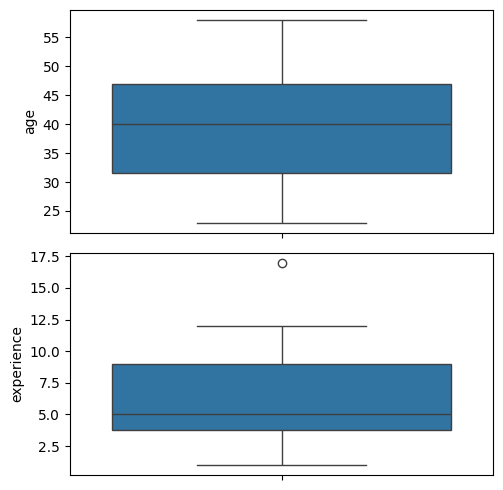

In [59]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1=sns.boxplot(df['age'],ax=axs[0]) # Changed axis[1] to axs[0]
plt2 = sns.boxplot(df['experience'], ax = axs[1])
plt.tight_layout()

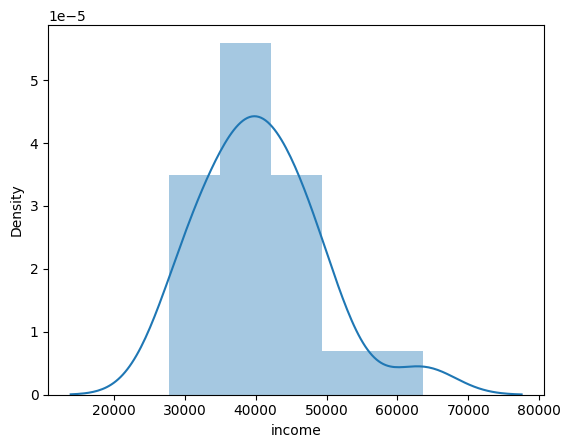

In [61]:
sns.distplot(df['income']);

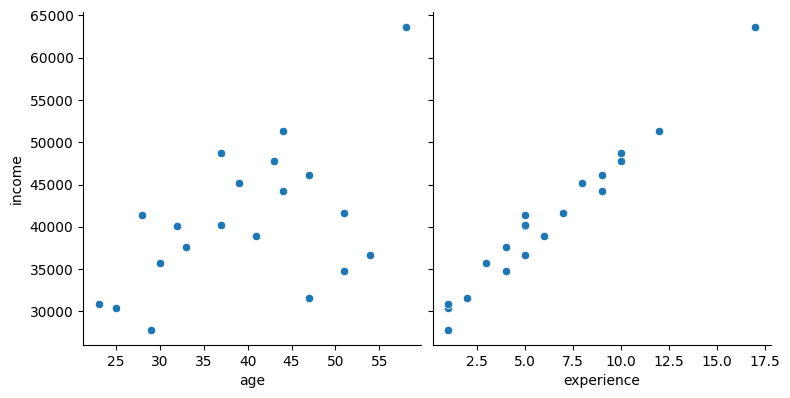

In [63]:
sns.pairplot(df, x_vars=['age', 'experience'], y_vars='income', height=4, aspect=1, kind='scatter')
plt.show()

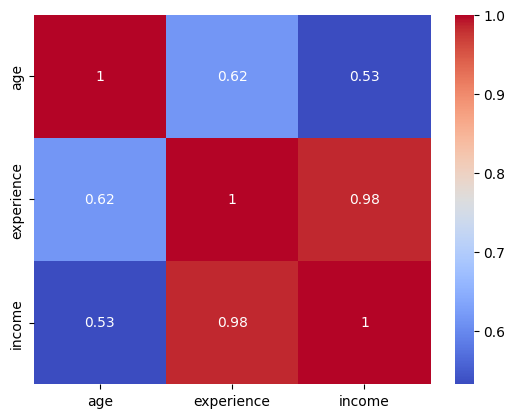

In [64]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [65]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [66]:
y_train.shape

(14,)

In [67]:
y_test.shape

(6,)

In [69]:
reg_model = linear_model.LinearRegression

In [72]:
reg_model = LinearRegression().fit(X_train, y_train)

In [73]:
print('Intercept: ',reg_model.intercept_)
list(zip(X, reg_model.coef_))

Intercept:  30510.643844104634


[('age', -79.68088640690299), ('experience', 2167.573549181646)]

In [74]:
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [77]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [30845.56 49238.19 46273.8  46512.85 35117.21 39117.45]


In [78]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
17,30870,30845.557006
19,48700,49238.186539
11,46110,46273.804126
18,44190,46512.846785
13,34800,35117.212834
6,41340,39117.446771


In [80]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 931.5077511414116
Mean Square Error: 1792176.3379165696
Root Mean Square Error: 1338.7219046226776


SIMPLE LINEAR REGRESSION

In [82]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
 Salary= pd.DataFrame(pd.read_csv("/content/SLR_Salary_dataset.csv"))
Salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [87]:
 Salary.shape

(30, 3)

In [88]:
 Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [89]:
 Salary.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [90]:
 Salary.isnull().sum()*100/ Salary.shape[0]

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


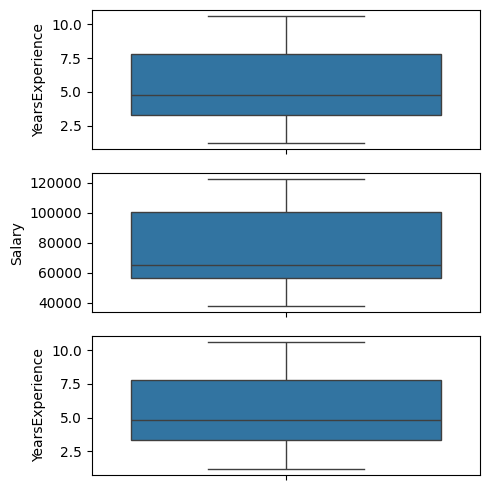

In [92]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(Salary['YearsExperience'], ax = axs[0]) # Changed advertising to Salary and 'TV' to 'YearsExperience'
plt2 = sns.boxplot(Salary['Salary'], ax = axs[1]) # Changed advertising to Salary and 'Newspaper' to 'Salary'
plt3 = sns.boxplot(Salary['YearsExperience'], ax = axs[2]) # Changed advertising to Salary and 'Radio' to 'YearsExperience', assuming you want to visualize this column as well. Adjust column name as needed
plt.tight_layout()

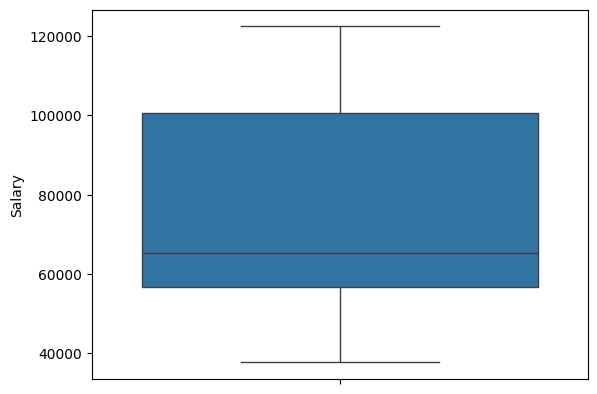

In [95]:
sns.boxplot(Salary['Salary'])
plt.show()

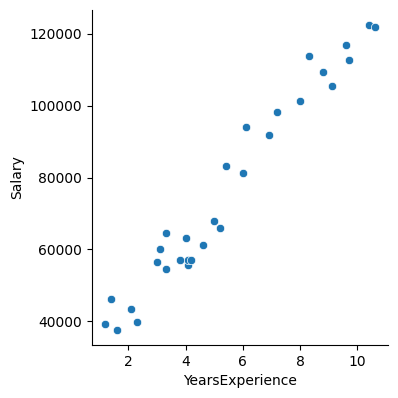

In [97]:
sns.pairplot(Salary, x_vars=['YearsExperience'], y_vars='Salary', height=4, aspect=1, kind='scatter')
plt.show()

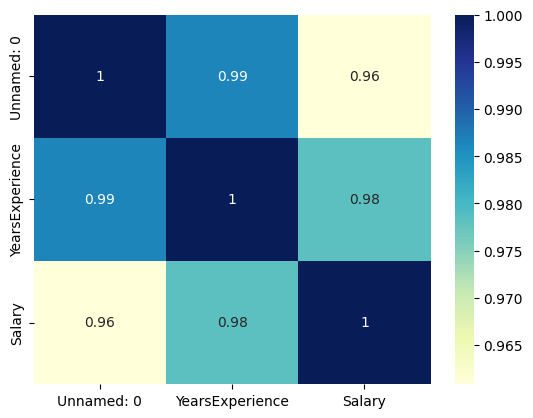

In [99]:
sns.heatmap(Salary.corr(), cmap="YlGnBu", annot = True) # Changed advertising to Salary
plt.show()

In [102]:
X = Salary['YearsExperience']
y = Salary['Salary']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=42)

In [105]:
X_train.head()

,YearsExperience
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2


In [106]:
y_train.head()

,Salary
0,39344.0
4,39892.0
16,66030.0
5,56643.0
13,57082.0


In [107]:
import statsmodels.api as sm

In [109]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [110]:

lr.params

,0
const,24985.530163
YearsExperience,9339.081724


In [111]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     427.6
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.74e-14
Time:                        08:58:32   Log-Likelihood:                -210.19
No. Observations:                  21   AIC:                             424.4
Df Residuals:                      19   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.499e+04   2546.938     

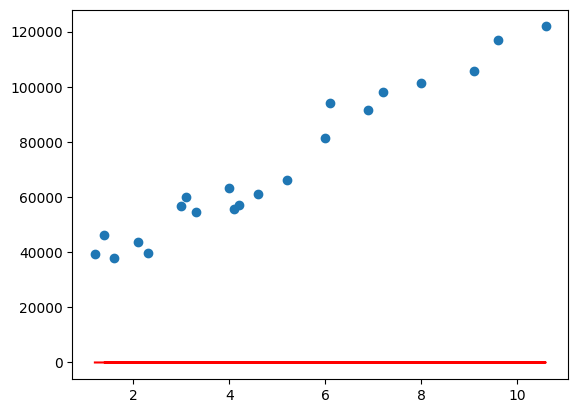

In [112]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [113]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

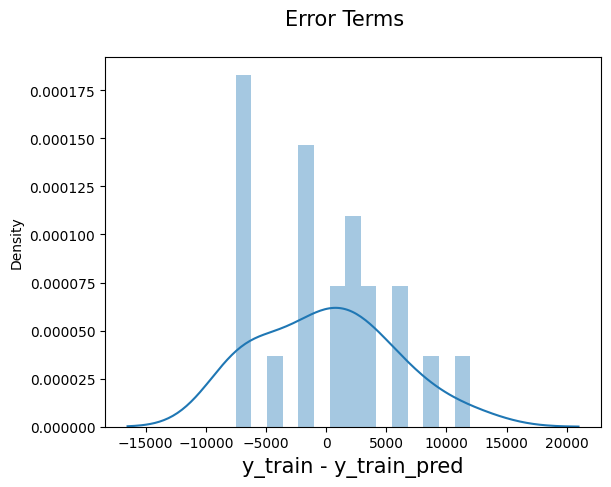

In [114]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

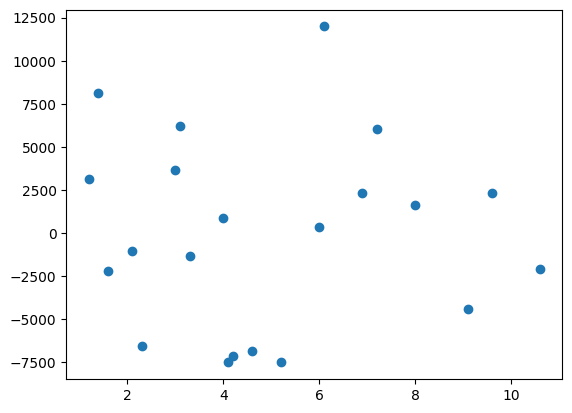

In [115]:
plt.scatter(X_train,res)
plt.show()

In [117]:
y_pred[:5]

array([30845.56, 49238.19, 46273.8 , 46512.85, 35117.21])

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [124]:

X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [125]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9414466227178213

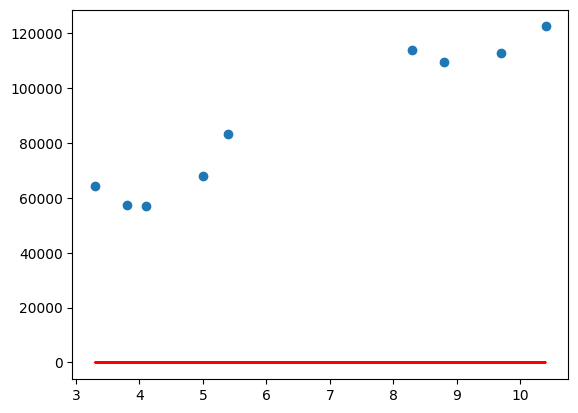

In [126]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()